In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
import numpy as np
from sklearn import svm
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('random_data.csv')
df_2 = pd.read_csv('random_data_2.csv')
df_3 = pd.read_csv('random_data_3.csv')

**Analysera de tre olika dataseten och välj det som anser har bäst kvalitet**

In [3]:
null_values =  df.isnull()
null_true = null_values.sum().sum()
null_false = null_values.size - null_true
list_of_null = f"{null_true} True and {null_false} False"
print (list_of_null)

0 True and 3000 False


In [4]:
df.describe()

,feature_1,feature_2,target
count,1000.000000,1000.000000,1000.00000
mean,-0.012506,-0.021365,0.50000
std,1.195156,1.155874,0.50025
min,-3.650544,-3.187975,0.00000
25%,-1.049857,-1.032517,0.00000
50%,0.468185,0.127183,0.50000
75%,1.003231,0.963168,1.00000
max,1.992686,2.372060,1.00000


In [5]:
df.head()

,feature_1,feature_2,target
0,0.811586,1.977330,1
1,-0.283428,-1.368891,0
2,-0.281272,0.858368,1
3,0.617176,1.293528,1
4,1.080526,0.815136,1


In [6]:
df.shape

(1000, 3)

In [7]:
null_values =  df_2.isnull()
null_true = null_values.sum().sum()
null_false = null_values.size - null_true
list_of_null = f"{null_true} True and {null_false} False"
print (list_of_null)

0 True and 3000 False


In [8]:
df_2.describe()

,feature_1,feature_2,target
count,1000.000000,1000.000000,1000.000000
mean,0.020940,-0.011339,0.496000
std,1.166321,1.156151,0.500234
min,-2.972555,-3.187975,0.000000
25%,-0.950602,-1.006720,0.000000
50%,0.478692,0.236545,0.000000
75%,1.001860,0.954061,1.000000
max,1.992686,2.344732,1.000000


In [9]:
df_2.head()

,feature_1,feature_2,target
0,0.811586,1.977330,1
1,-0.283428,-1.368891,0
2,-0.281272,0.858368,1
3,0.617176,1.293528,1
4,1.080526,0.815136,1


In [10]:
df_2.shape

(1000, 3)

In [11]:
null_values =  df_3.isnull()
null_true = null_values.sum().sum()
null_false = null_values.size - null_true
list_of_null = f"{null_true} True and {null_false} False"
print (list_of_null)

99 True and 3901 False


In [12]:
df_3.describe()

,Unnamed: 0,feature_1,feature_2,target
count,1000.000000,950.000000,951.000000,1000.00000
mean,499.500000,-0.016061,-0.011498,0.50000
std,288.819436,1.203023,1.161757,0.50025
min,0.000000,-3.650544,-3.187975,0.00000
25%,249.750000,-1.058225,-1.026506,0.00000
50%,499.500000,0.474490,0.144929,0.50000
75%,749.250000,1.003046,0.974699,1.00000
max,999.000000,1.992686,2.372060,1.00000


In [13]:
df_3.head()

,Unnamed: 0,feature_1,feature_2,target
0,0,0.811586,1.977330,1
1,1,-0.283428,NaN,0
2,2,-0.281272,0.858368,1
3,3,0.617176,1.293528,1
4,4,1.080526,0.815136,1


In [14]:
df_3.shape

(1000, 4)

*fråga 1: Saknas det värden?*
I random_data_3 saknas det värden i Feature_2. 

In [15]:
dupe= df.duplicated()
dupe_true = dupe.sum().sum()
dupe_false = dupe.size - dupe_true
list_of_dupe = f"{dupe_true} Dupes and {dupe_false} Non Dupes"
print (list_of_dupe)

0 Dupes and 1000 Non Dupes


In [16]:
dupe= df_2.duplicated()
dupe_true = dupe.sum().sum()
dupe_false = dupe.size - dupe_true
list_of_dupe = f"{dupe_true} Dupes and {dupe_false} Non Dupes"
print (list_of_dupe)

500 Dupes and 500 Non Dupes


In [17]:
dupe= df_3.duplicated()
dupe_true = dupe.sum().sum()
dupe_false = dupe.size - dupe_true
list_of_dupe = f"{dupe_true} Dupes and {dupe_false} Non Dupes"
print (list_of_dupe)

0 Dupes and 1000 Non Dupes


*fråga 2: finns det dubbleter?*
random_data_2 har dubbleter.

*Fråga 3: Finns det extremvärden?

array([[<Axes: title={'center': 'feature_1'}>,
        <Axes: title={'center': 'feature_2'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

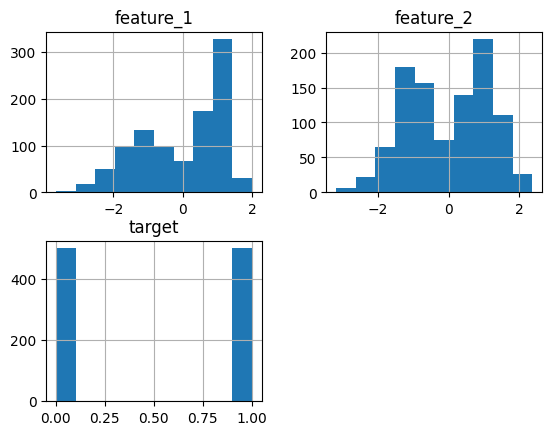

In [18]:
df.hist()

array([[<Axes: title={'center': 'feature_1'}>,
        <Axes: title={'center': 'feature_2'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

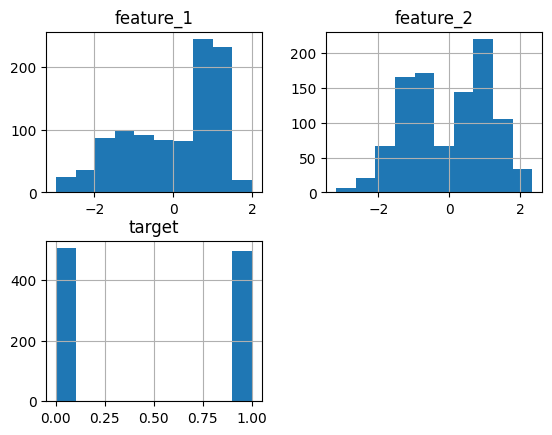

In [19]:
df_2.hist()

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'feature_1'}>],
       [<Axes: title={'center': 'feature_2'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

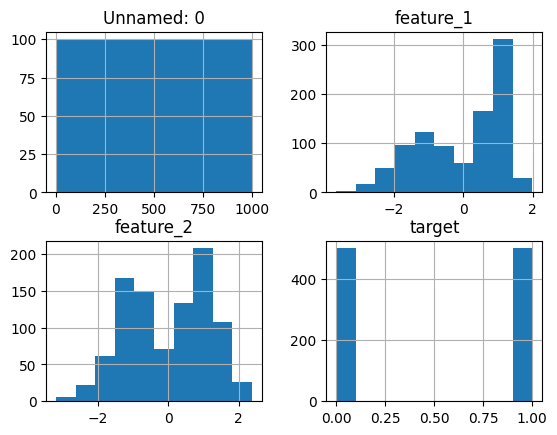

In [20]:
df_3.hist()

*svar*
Det finns extremvärden i random_data_3. Det är Unnamed 0 som står för de.  Den är också bara junkvärde och tilför inget. 

*fråga 4: Finns det något annat?*
svar: båda feature_1 i random_data och random_data_3 är nästa excakt likadana. 

**Rita ut all data (med klasser i olika färger)**

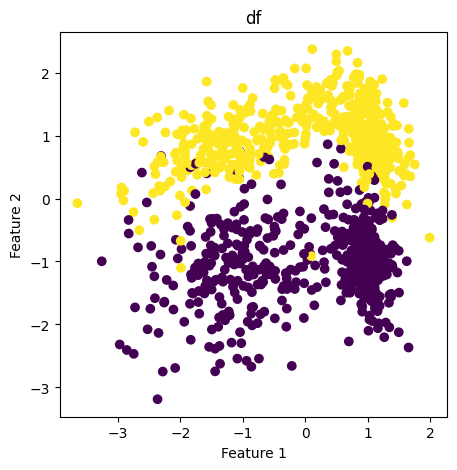

In [21]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(df['feature_1'], df['feature_2'], c=df['target'])


ax.set_title('df')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')


plt.show()

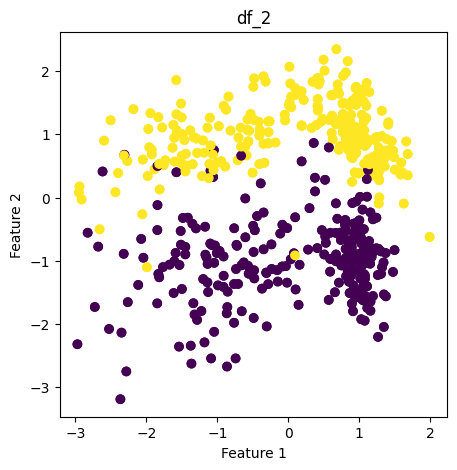

In [22]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(df_2['feature_1'], df_2['feature_2'], c=df_2['target'])


ax.set_title('df_2')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')


plt.show()

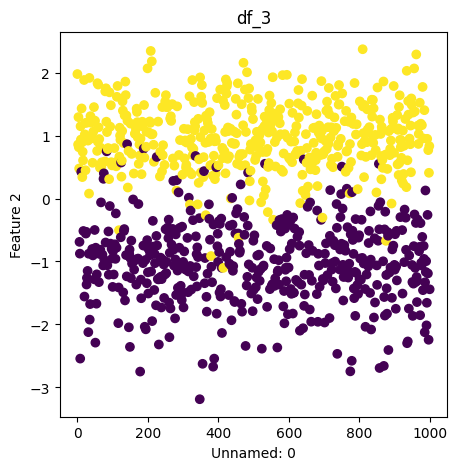

In [23]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(df_3['Unnamed: 0'], df_3['feature_2'], c=df_3['target'])


ax.set_title('df_3')
ax.set_xlabel('Unnamed: 0')
ax.set_ylabel('Feature 2')


plt.show()

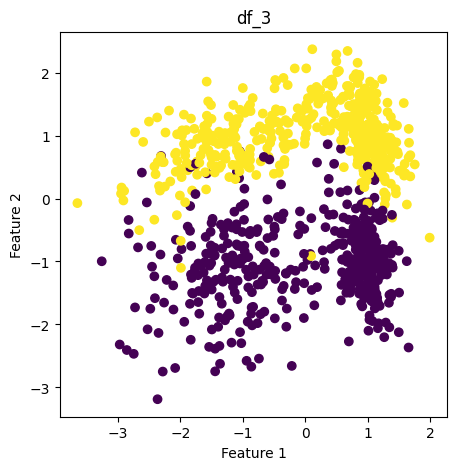

In [24]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(df_3['feature_1'], df_3['feature_2'], c=df_3['target'])


ax.set_title('df_3')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')


plt.show()

*Fråga: Ser det ut som det är möjligt att skapa en bra klassificering?*
svar: Jag skulle använda mig av df (random_data) för klassificering. Den har inga nullvärden och den har inga dubbleter. Det finns också två klasser (Feature_1 och Feature_2) som går att användas av. 

**Träna en support vector Machine**

In [25]:
X = df.drop(columns=['target'])
y = df['target']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [27]:
print(y.shape, y_train.shape, y_test.shape)

(1000,) (800,) (200,)


In [28]:
svm_model = svm.SVC(kernel= 'linear')

In [29]:
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

In [30]:
svm_model.score(X_train,y_train)

0.9475

In [31]:
svm_model.score(X_test,y_test)

0.985

*vad får modellen för testscore?*
svar: Den får 98.5.

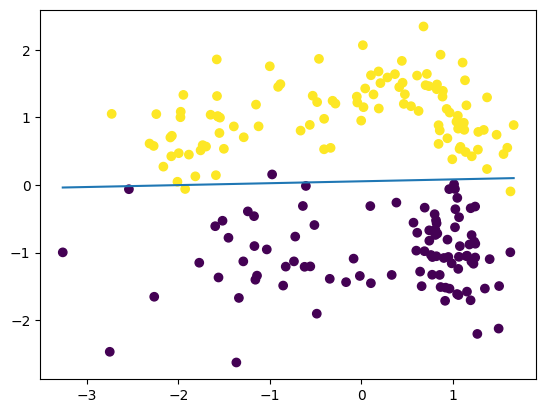

In [32]:
def plot_hyperplane(X, y, svm_model):
    # plot data
    plt.scatter(X['feature_1'], X['feature_2'], c=y)

    # plot the hyperplane
    w = svm_model.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(X['feature_1'].min(), X['feature_1'].max())
    yy = a * xx - (svm_model.intercept_[0]) / w[1]
    plt.plot(xx, yy)

    plt.show()
plot_hyperplane(X_test, y_test, svm_model)

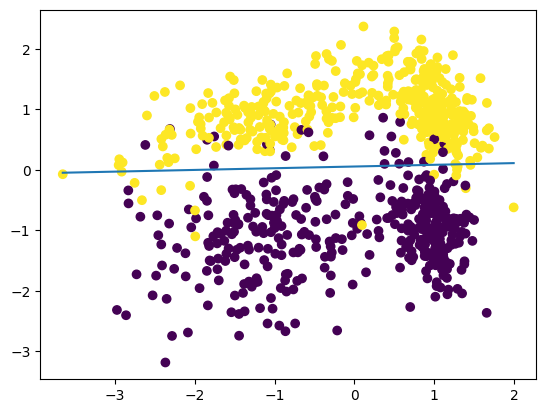

In [33]:
def plot_hyperplane(X, y, svm_model):
    # plot data
    plt.scatter(X['feature_1'], X['feature_2'], c=y)

    # plot the hyperplane
    w = svm_model.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(X['feature_1'].min(), X['feature_1'].max())
    yy = a * xx - (svm_model.intercept_[0]) / w[1]
    plt.plot(xx, yy)

    plt.show()
plot_hyperplane(X_train, y_train, svm_model)